In [3]:
import glob
import numpy as np
import scipy.io
from tqdm import tqdm
import h5py
import matplotlib.pyplot as plt
from parula import parula_map

In [4]:
def expd(original_mat, expd_size, sample_ratio):
    ori_sz = original_mat.shape[0]
    if (ori_sz<expd_size) :
        sz_diff = np.floor((expd_size-original_mat.shape[0])/2).astype(int)
        output = np.zeros([expd_size,expd_size])
        output[sz_diff:sz_diff+original_mat.shape[0], sz_diff:sz_diff+original_mat.shape[1]] = original_mat
    else:
        output = original_mat[int(np.floor(ori_sz/2)-np.floor(expd_size/2)):int(np.floor(ori_sz/2)+np.floor(expd_size/2)),
                            int(np.floor(ori_sz/2)-np.floor(expd_size/2)):int(np.floor(ori_sz/2)+np.floor(expd_size/2))]
    return output[::sample_ratio,::sample_ratio]

def loadMat(filePath, expd_size, matlab_var,sample_ratio):
    # data_dict = mat73.loadmat('data.mat')
    tmp = scipy.io.loadmat(filePath)[matlab_var]
    # tmp = mat73.loadmat(filePath).get(matlab_var)

    try:
        tmp = tmp.todense()
    except:
        pass

    tmp = expd(tmp, expd_size, sample_ratio)
    tmp = np.expand_dims(tmp,axis=0)
    tmp = np.expand_dims(tmp,axis=0)
    tmp = np.expand_dims(tmp,axis=4)
    return tmp

def matrix(file):
    contents = open(file).read()
    return [item.split() for item in contents.split('\n')[:-1]]

In [3]:
cases = glob.glob('D:\\NeuronGrowthML\\Matlab_simulation_data_neuriteFeatures\\PSC_batch_gc2_new\\case*')
cases.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
expd_sz = 400
sample_ratio = 1

dm_sz = int(expd_sz/sample_ratio)
numCases = int(len(cases))

for i in range(numCases):
    case = cases[i].replace('D:\\NeuronGrowthML\\Matlab_simulation_data_neuriteFeatures\\PSC_batch_gc2_new\\case','')

    divLog = matrix(cases[i]+'\\data\\divLog.txt')
    div = divLog[-1][0][0]

    # defined input data folder and grab a list of data files
    phiPath = glob.glob(cases[i]+'\\data\\phi_*00.mat')
    phiPath.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))

    # if float(div)<6 :
    print(case+'|'+div)
        
    phi_final = loadMat(phiPath[-1], expd_sz, 'phi_plot', 1)
    plt.figure(figsize=(4, 4), dpi=300)
    plt.imshow(phi_final[0,0,:,:,0],cmap = parula_map)
    plt.title(case+'|'+div)
    plt.colorbar()
    plt.savefig(f'D:\\NeuronGrowthML\\Matlab_simulation_data_neuriteFeatures\\PSC_batch_gc2_new\\all_results\\phi_final_{i}.png')
    plt.close()

1_1|6
1_2|6
1_3|6
1_4|6
1_5|6
1_6|6
1_7|6
1_8|4
1_9|6
2_1|4
2_2|4
2_3|4
2_4|3
2_5|4
2_6|6
2_7|4
2_8|4
2_9|4
3_1|3
3_2|3
3_3|3
3_4|3
3_5|4
3_6|3
3_7|4
3_8|3
3_9|4
4_1|4
4_2|3
4_3|3
4_4|3
4_5|3
4_6|3
4_7|3
4_8|3
4_9|3
5_1|3
5_2|3
5_3|3
5_4|3
5_5|3
5_6|2
5_7|3
5_8|3
5_9|2
6_1|3
6_2|3
6_3|3
6_4|3
6_5|3
6_6|3
6_7|3
6_8|3
6_9|2
7_1|2
7_2|3
7_3|2
7_4|2
7_5|2
7_6|2
7_7|2
7_8|2
7_9|2
1_10|4
1_11|4
1_12|6
1_13|6
1_14|4
1_15|4
1_16|4
1_17|4
1_18|6
1_19|6
1_20|6
1_21|6
1_22|6
1_23|6
1_24|3
1_25|6
1_26|6
1_27|6
1_28|6
1_29|4
1_30|4
2_10|4
2_11|4
2_12|4
2_13|4
2_14|4
2_15|4
2_16|3
2_17|6
2_18|4
2_19|4
2_20|4
3_10|3
3_11|3
3_12|3
3_13|3
3_14|3
3_15|4
3_16|3
3_17|3
3_18|3
3_19|3
3_20|4
3_50|3
3_51|3
4_10|3
4_11|4
4_12|3
4_13|3
4_14|3
4_15|3
4_16|3
4_17|3
4_18|3
4_19|3
4_20|3
4_50|4
5_10|3
5_11|3
5_12|3
5_13|3
5_14|3
5_15|3
5_16|3
5_17|3
5_18|3
5_19|3
5_20|3
5_50|2
6_10|3
6_11|2
6_12|2
6_13|3
6_14|2
6_15|3
6_16|2
6_17|2
6_18|2
6_19|3
6_20|3
6_50|3
6_51|3
7_10|2
7_11|2
7_12|2
7_13|2
7_14|2
7_15|2
7_16|2

In [5]:
save_file_1 = '../dataset_for_ML/NG_all_case_time_structured_featureDrivenModel_04142023.hdf5'
save_file_2 = '../dataset_for_ML/NG_all_CNN_restructured_featureDrivenModel_04142023.hdf5'

# get all cases folder name
cases = glob.glob('D:\\NeuronGrowthML\\Matlab_simulation_data_neuriteFeatures\\PSC_batch_gc2_new\\case*')
cases.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))

expd_sz = 600
sample_ratio = 2
numExtract = 60

dm_sz = int(expd_sz/sample_ratio)
numCases = int(len(cases))
hdf5_file = h5py.File(save_file_1, mode='w')
hdf5_file.create_dataset("NG_data", (numCases,numExtract,dm_sz,dm_sz,3), np.float32, chunks=(1,1,dm_sz,dm_sz,3), compression="gzip")

for i in tqdm(range(numCases), desc=f'Running ...'):
# for i in range(numCases):
    case = cases[i].replace('D:\\NeuronGrowthML\\Matlab_simulation_data_neuriteFeatures\\PSC_batch_gc2_new\\case','')

    # defined input data folder and grab a list of data files
    phiPath = glob.glob(cases[i]+'\\data\\phi_*00.mat')
    phiPath.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))

    # calculate iterations to be extracted
    end_iter = phiPath[-1].replace(cases[i]+'\\data\\phi_','')
    end_iter = int(end_iter.replace('.mat',''))
    iter_incre = int(np.floor((end_iter/numExtract)/100)*100)
    
    # load theta
    thetaPath = glob.glob(cases[i]+'\\data\\theta_'+str(end_iter)+'.mat')
    theta = loadMat(thetaPath[-1], expd_sz, 'theta_plot',sample_ratio)

    iters = 100
    # plt.figure(figsize=(15, 8), dpi=80)
    for j in range(numExtract):        
        # load phi
        phi_path = 'D:\\NeuronGrowthML\\Matlab_simulation_data_neuriteFeatures\\PSC_batch_gc2_new\\case'+str(case)+'\\data\\phi_'+str(iters)+'.mat'
        phi_dwn = np.round(loadMat(phi_path, expd_sz, 'phi_plot', sample_ratio))

        if np.max(phi_dwn)==0:
            print(f'!!{phiPath[j]}')

        # iter_mat = np.expand_dims(np.expand_dims(np.expand_dims((iters/end_iter)*np.ones([dm_sz,dm_sz]),axis=0),axis=0),axis=4)
        iter_mat = np.expand_dims(np.expand_dims(np.expand_dims((j/numExtract)*np.ones([dm_sz,dm_sz]),axis=0),axis=0),axis=4)
        iter_vars = np.concatenate([phi_dwn,theta,iter_mat],axis=4)
        hdf5_file["NG_data"][i,j,...] = iter_vars

        iters = int((j+1)*iter_incre)

        # plt.subplot(1,3,1)
        # plt.imshow(phi_dwn[0,0,:,:,0],cmap = parula_map)
        # plt.title(f'Case {case} | Iter {iters}')
        # plt.colorbar()
        # plt.subplot(1,3,2)
        # plt.imshow(theta[0,0,:,:,0],cmap = parula_map)
        # plt.title(f'Case {case} | Iter {iters}')
        # plt.colorbar()
        # plt.subplot(1,3,3)
        # plt.imshow(iter_mat[0,0,:,:,0],cmap = parula_map)
        # plt.title(f'Case {case} | Iter {iters}')
        # plt.colorbar()

    # plt.colorbar
    # plt.show()

hdf5_file.close()

Running ...: 100%|██████████| 105/105 [02:26<00:00,  1.40s/it]


(105, 60, 300, 300, 3)
Random ID: 83 | Random IDX 13


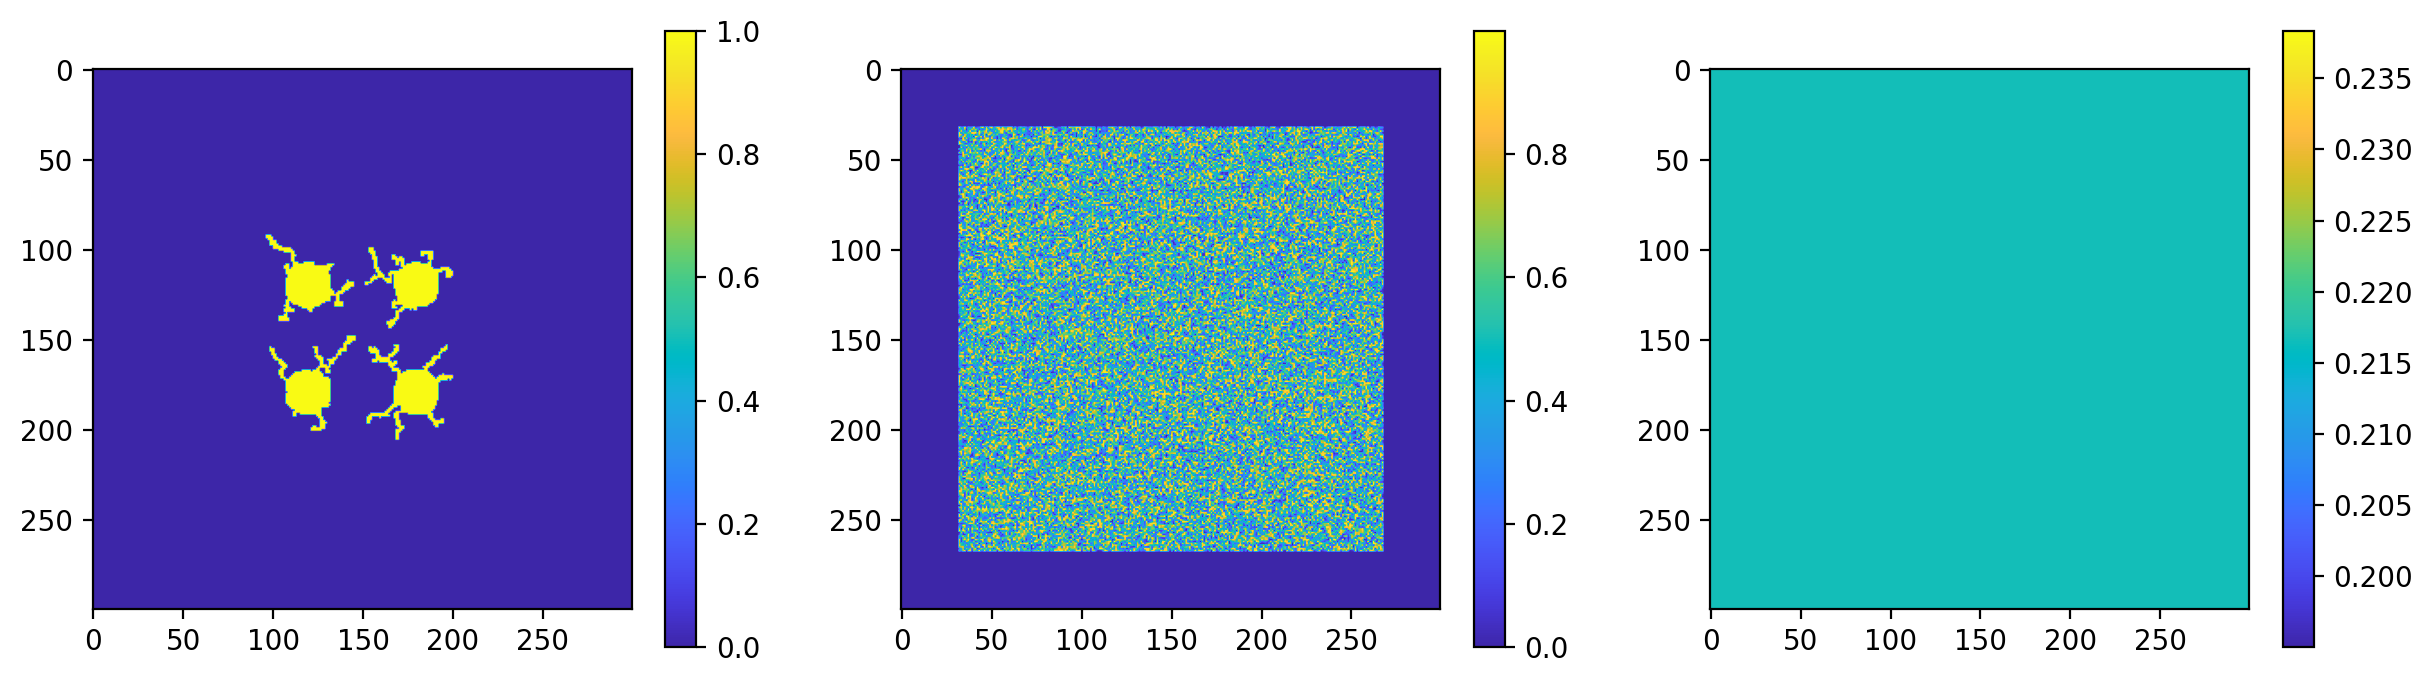

In [6]:
h5 = h5py.File(save_file_1, mode='r')
data = h5.get('NG_data')
print(data.shape)

id = np.random.randint(data.shape[0])
idx = np.random.randint(data.shape[1])
print(f'Random ID: {id} | Random IDX {idx}')
plt.figure(figsize=(20, 4), dpi=200)
plt.subplot(1,4,1)
plt.imshow(data[id,idx,:,:,0],cmap = parula_map)
plt.colorbar()
plt.subplot(1,4,2)
plt.imshow(data[id,idx,:,:,1],cmap = parula_map)
plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(data[id,idx,:,:,2],cmap = parula_map)
plt.colorbar()
# plt.subplot(1,4,4)
# plt.imshow(data[id,idx,:,:,3],cmap = parula_map)
# plt.colorbar()
plt.show()

In [7]:
# h5 = h5py.File(save_file_1, mode='r')
# data = h5.get('NG_data')
# print(data.shape)

# # for i in tqdm(range(data.shape[0]), desc="Checking ..." ):
# #     if np.max(data[i,0,:,:])==0:
# #         raise Exception(f'!! Not clean !! ind: {i} !!')
# #     else:
# #         continue
    
# print('Check passed.')

sz = data.shape[0]*(data.shape[1])
hdf5_file = h5py.File(save_file_2, mode='w')
hdf5_file.create_dataset("input", (sz, 3, data.shape[2],data.shape[3]), np.float32, chunks=(1, 2, data.shape[2],data.shape[3]), compression="gzip")
hdf5_file.create_dataset("output", (sz, 1, data.shape[2],data.shape[3]), np.float32, chunks=(1, 1, data.shape[2],data.shape[3]), compression="gzip")

k = 0
for i in tqdm(range(data.shape[0]), desc="Running ..."):
    for j in range(data.shape[1]):
        hdf5_file["input"][k,0,:,:] = data[i,0,:,:,0]
        hdf5_file["input"][k,1,:,:] = data[i,-1,:,:,1]
        hdf5_file["input"][k,2,:,:] = data[i,j,:,:,2]
        hdf5_file["output"][k,0,:,:] = data[i,j,:,:,0]
        k+=1  
hdf5_file.close()

Running ...: 100%|██████████| 105/105 [02:15<00:00,  1.29s/it]


Input data shape: (6300, 3, 300, 300) | Output data shape: (6300, 1, 300, 300)
Random ID: 4846


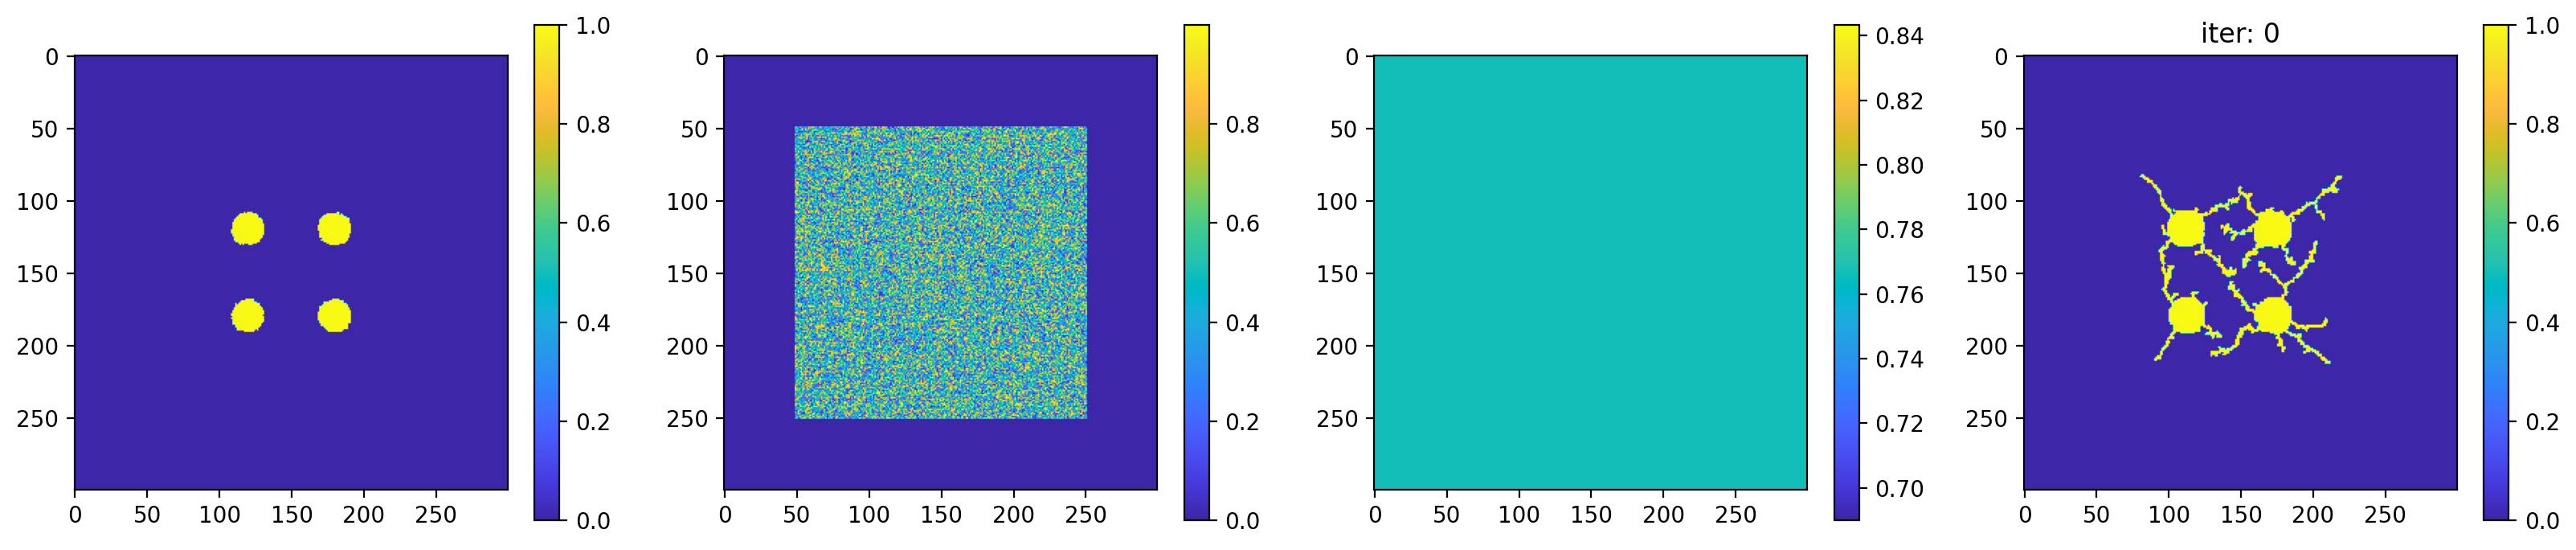

Random ID: 509


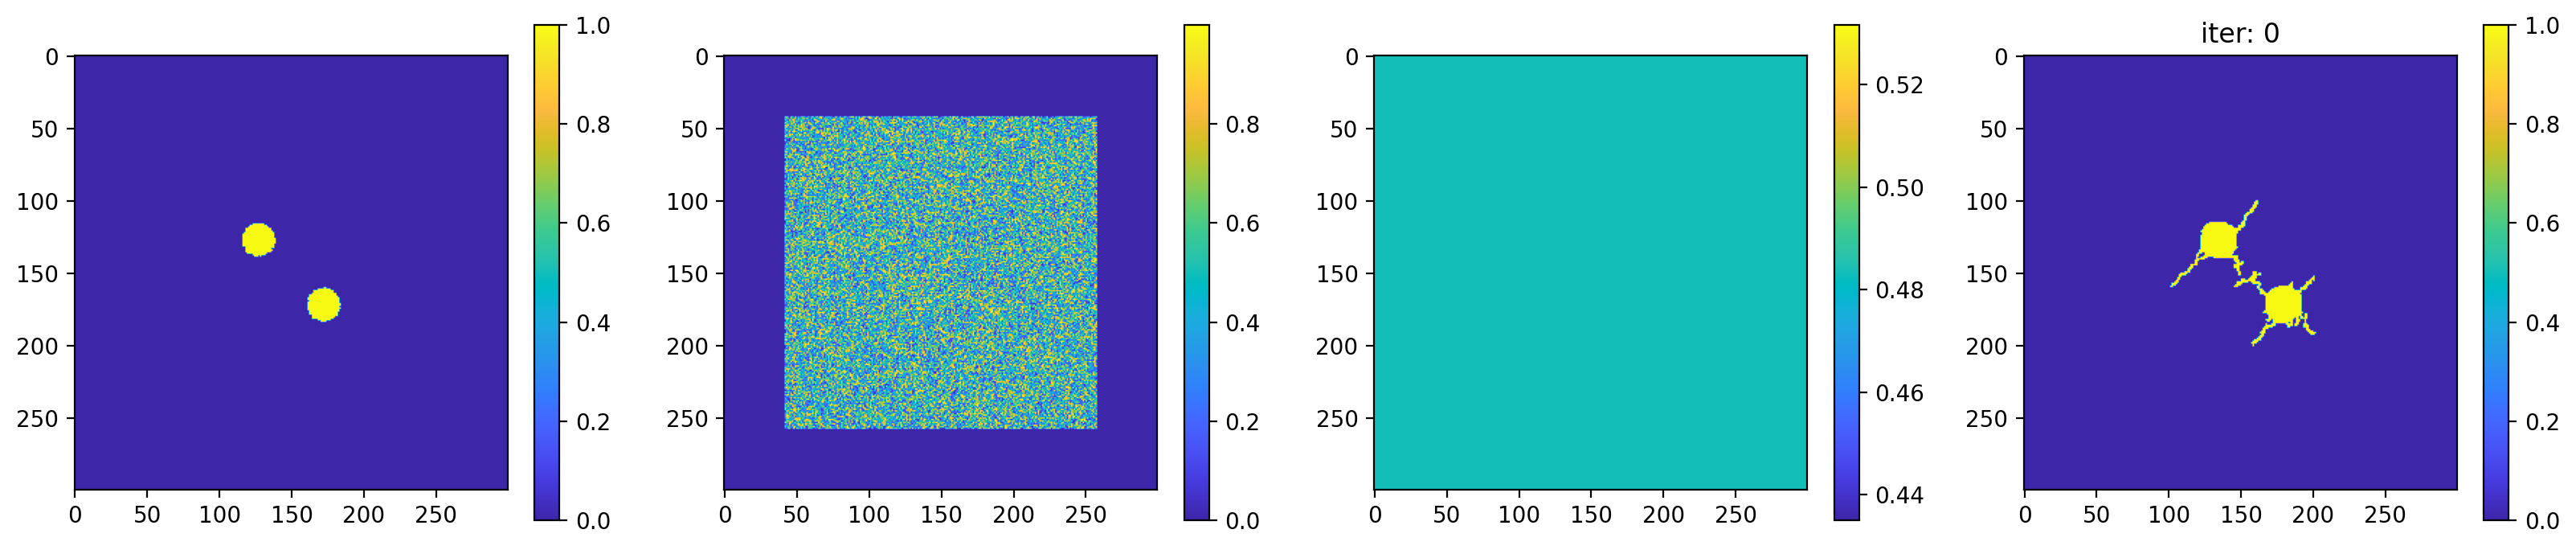

Random ID: 3247


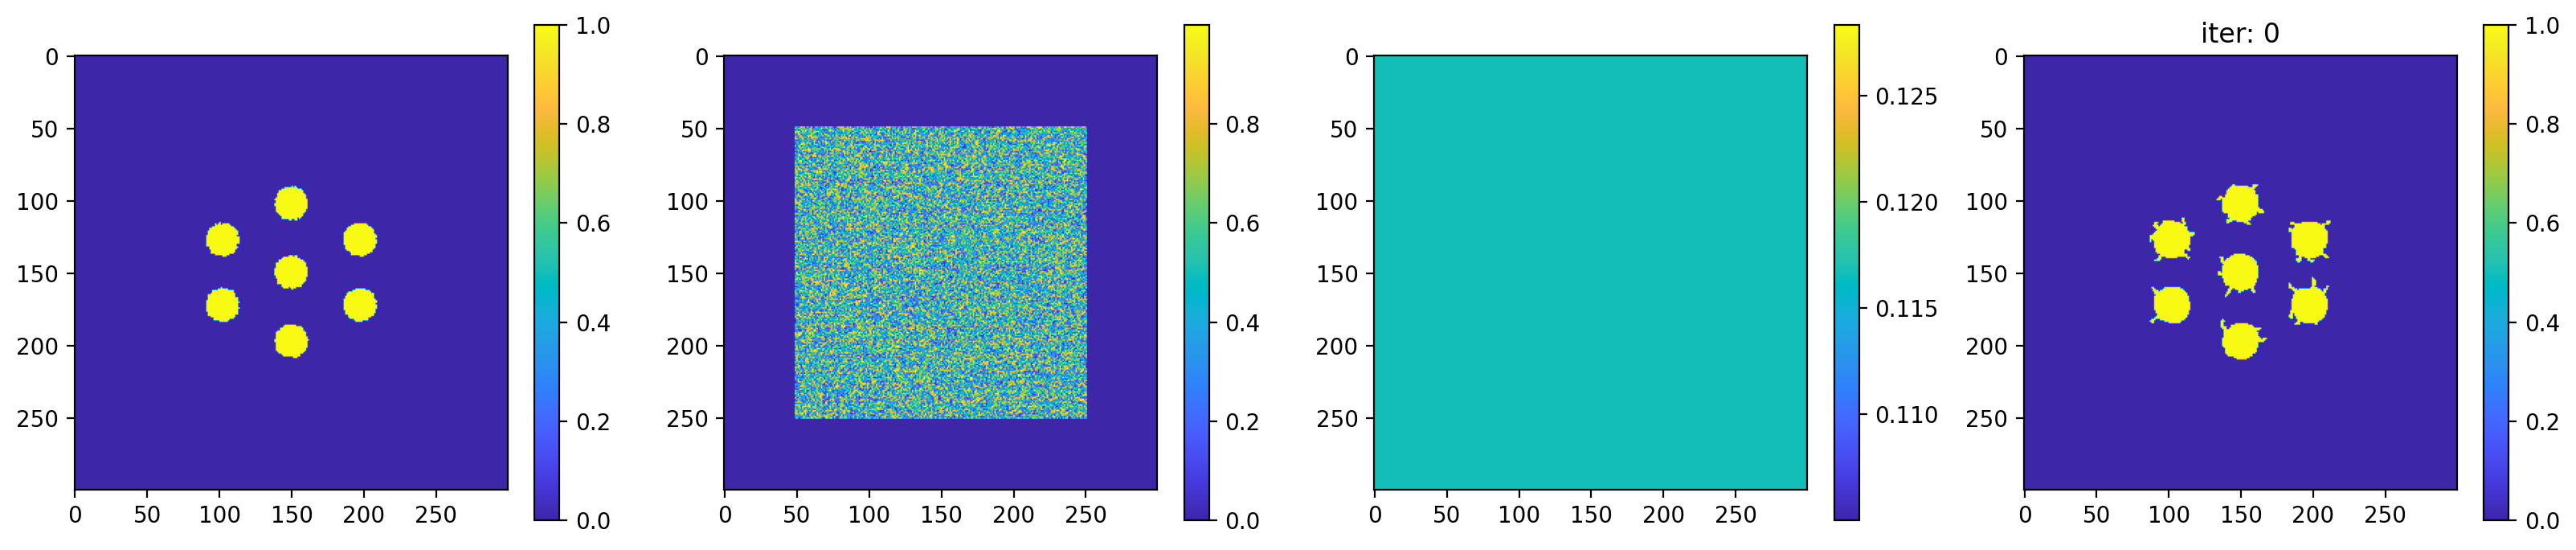

Random ID: 1286


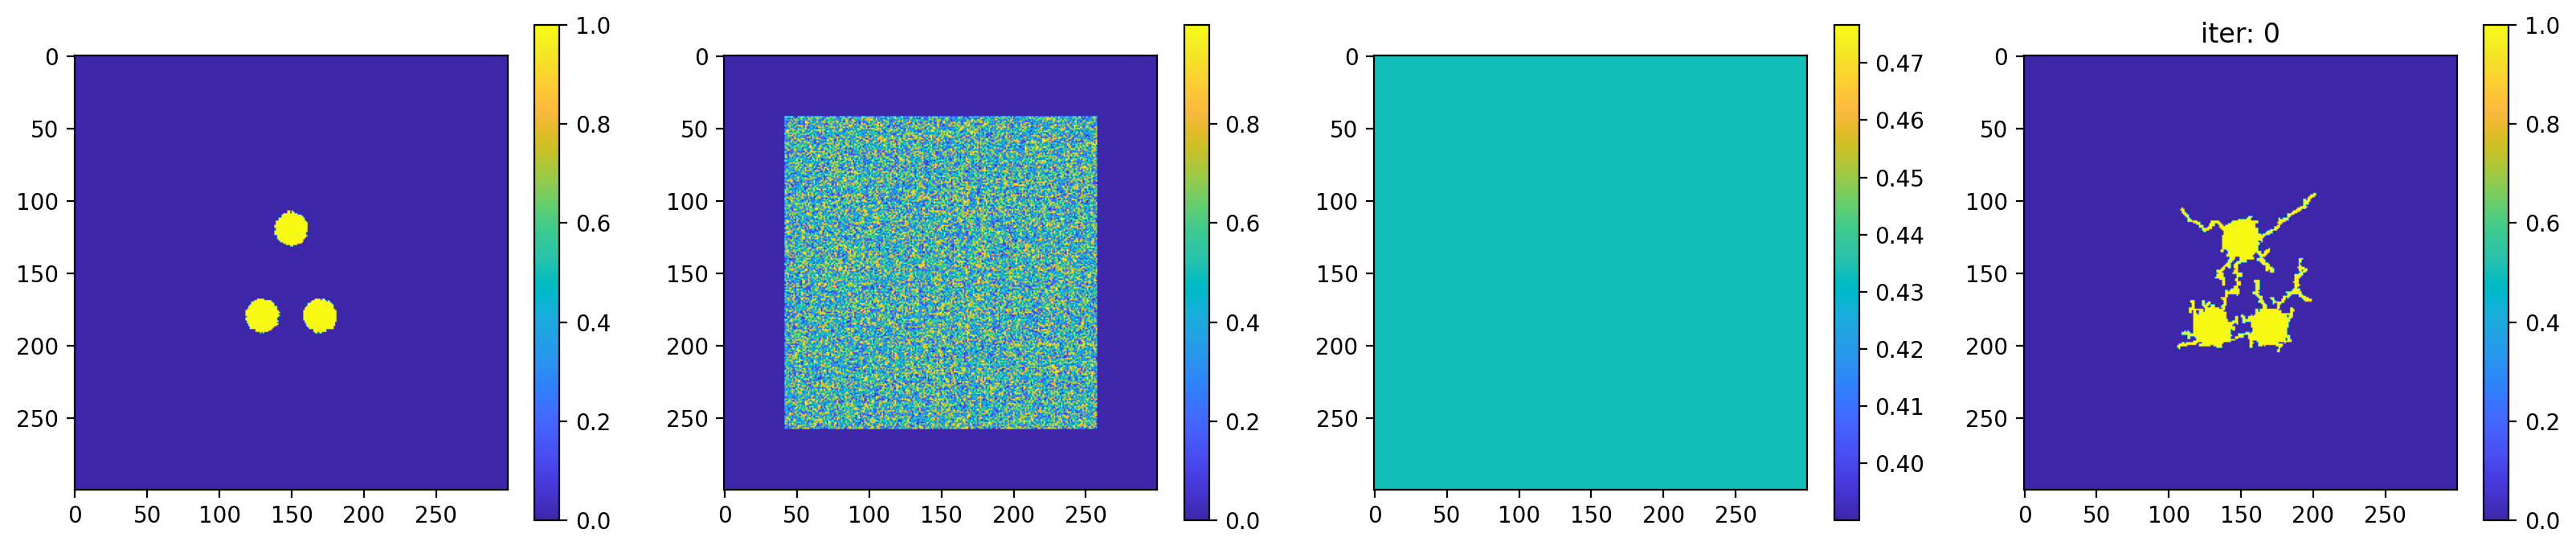

Random ID: 5504


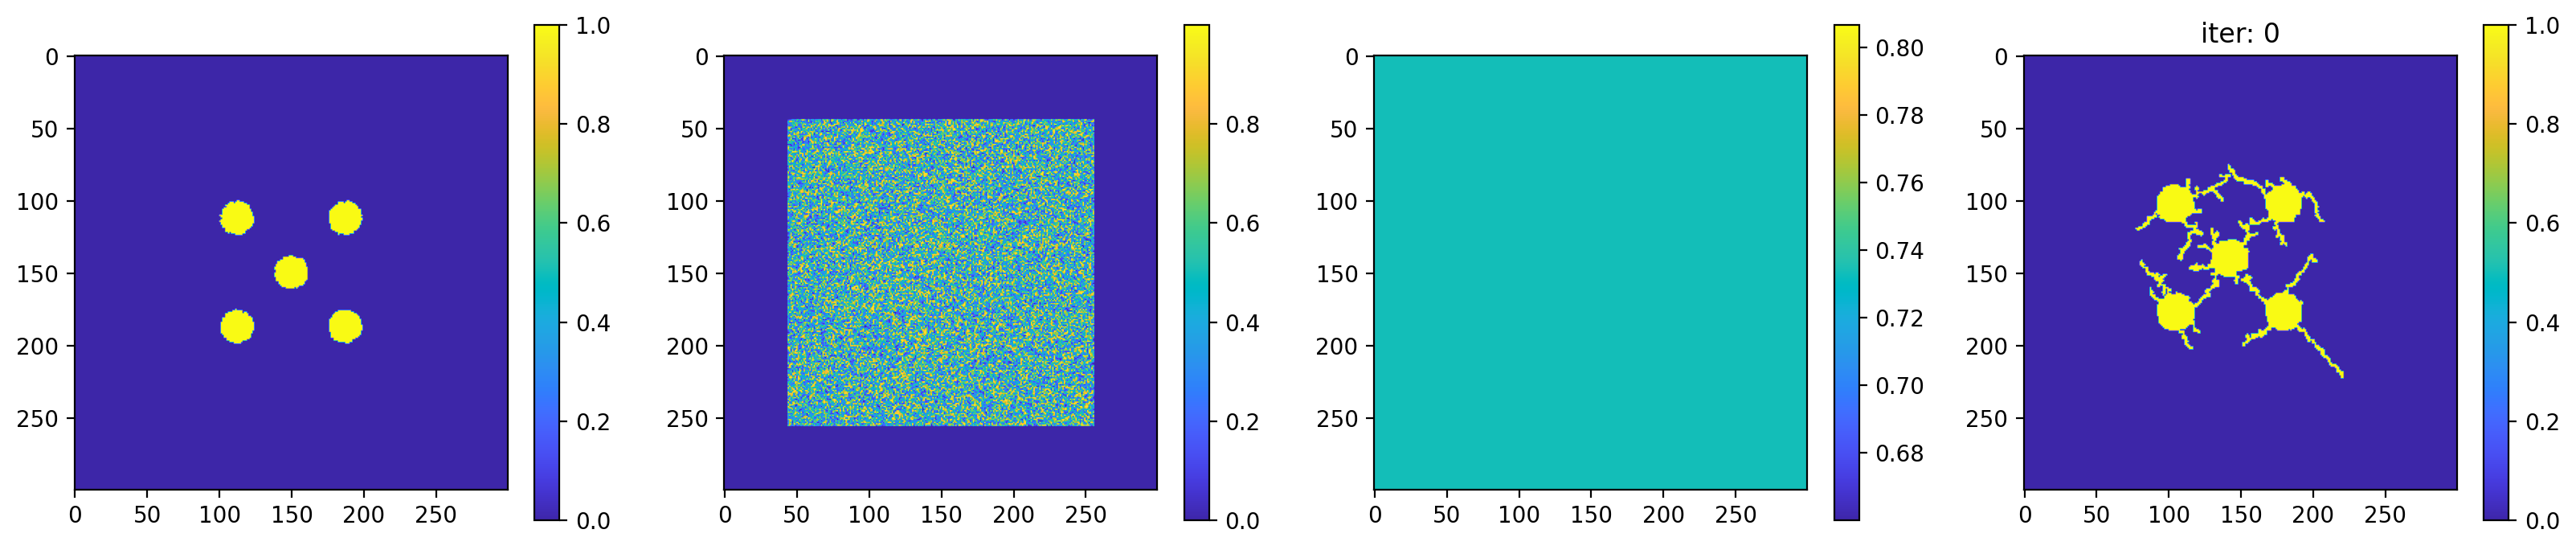

Random ID: 3926


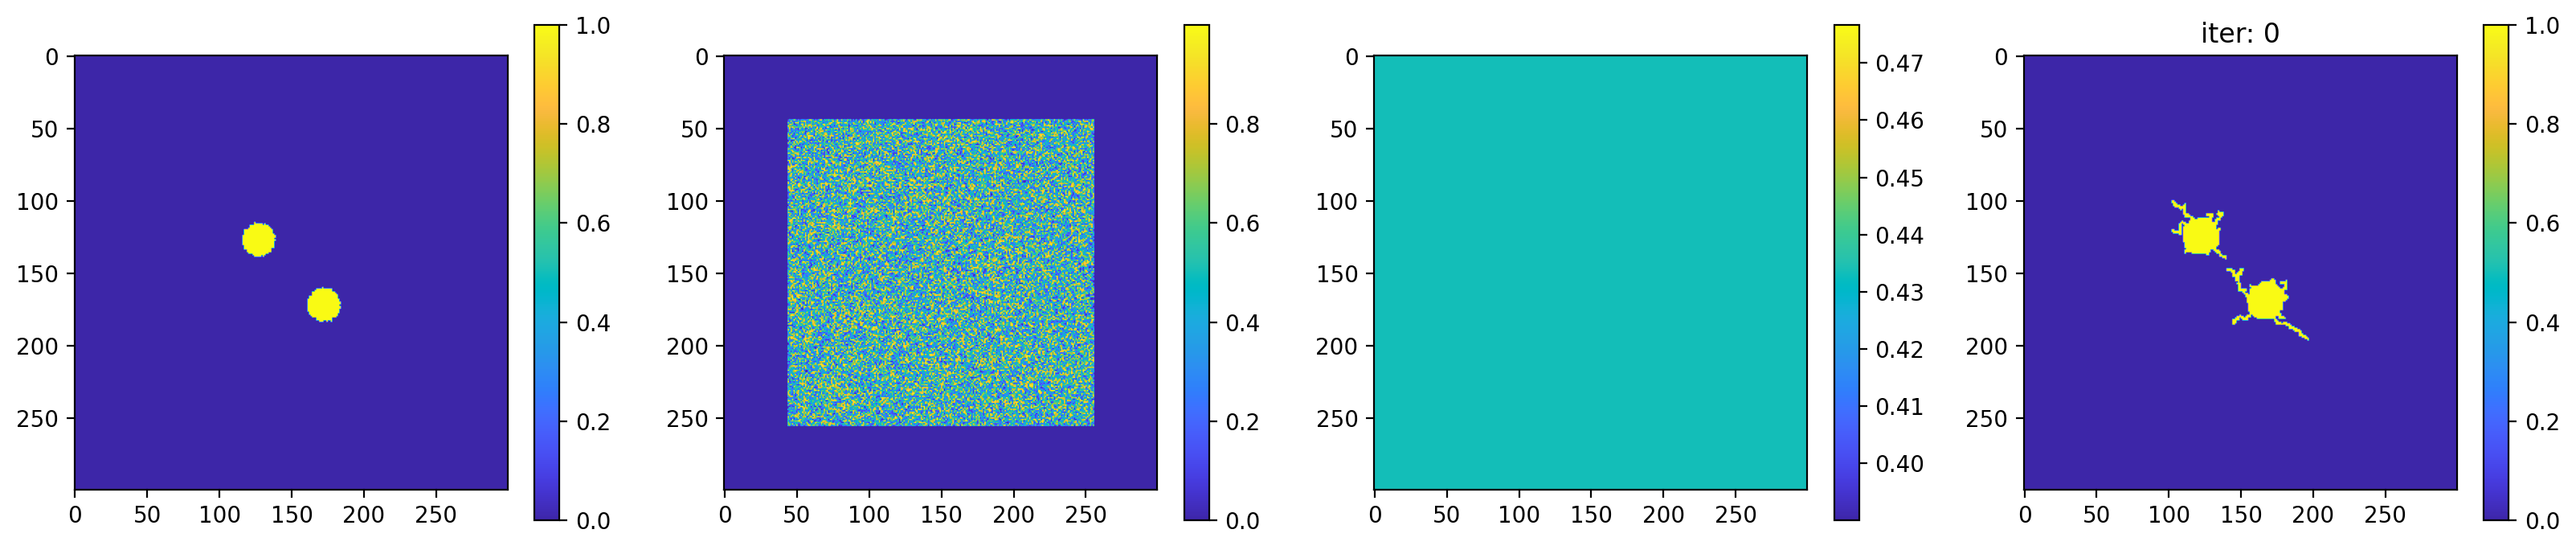

Random ID: 6058


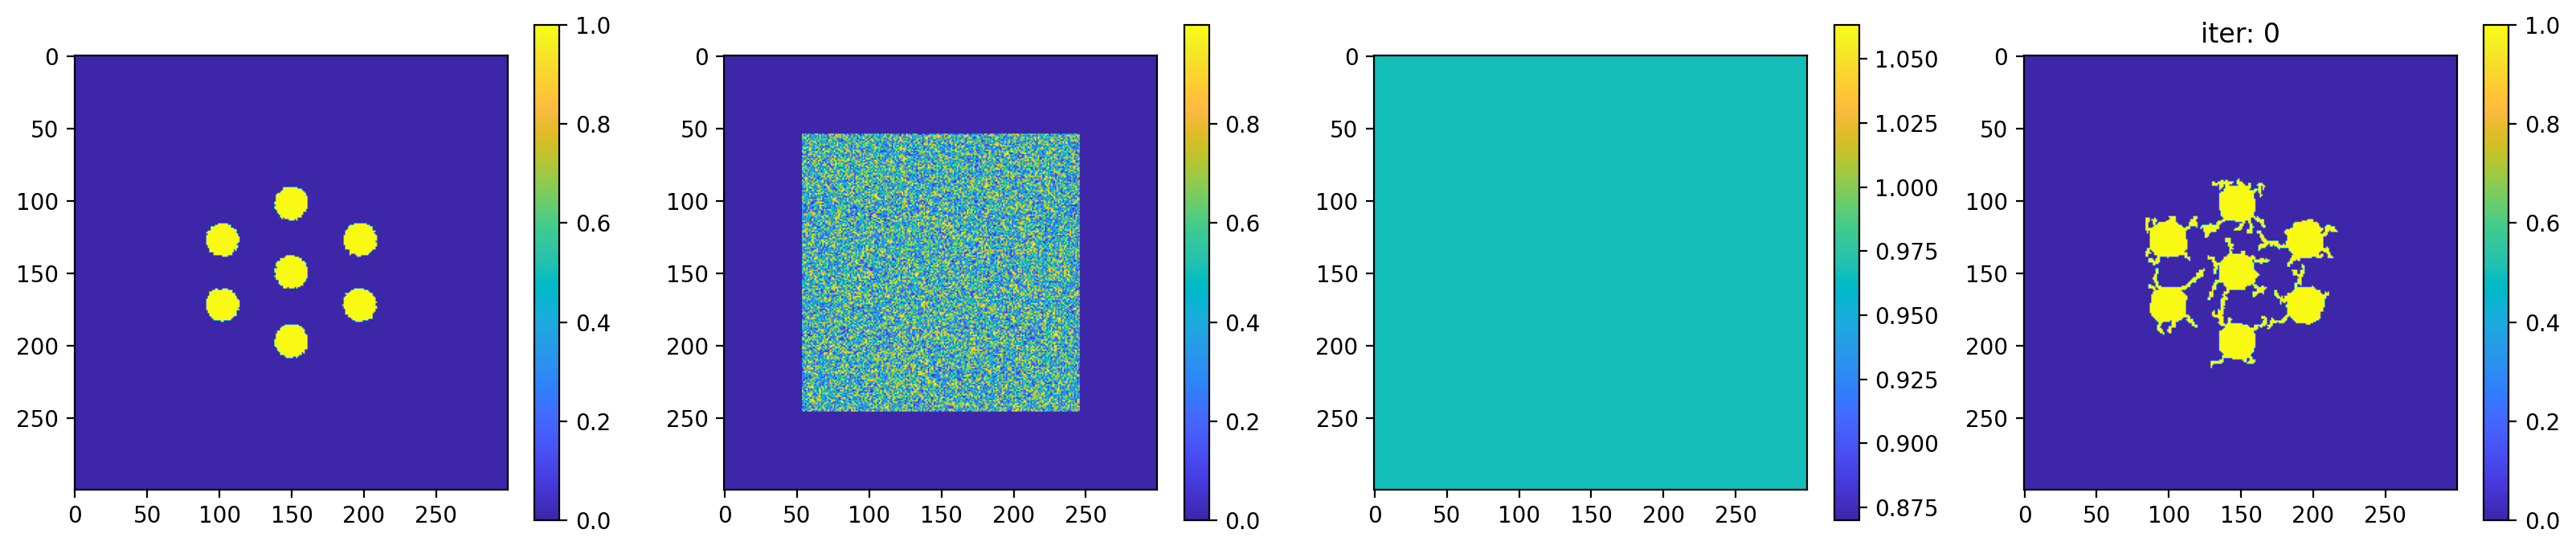

Random ID: 4689


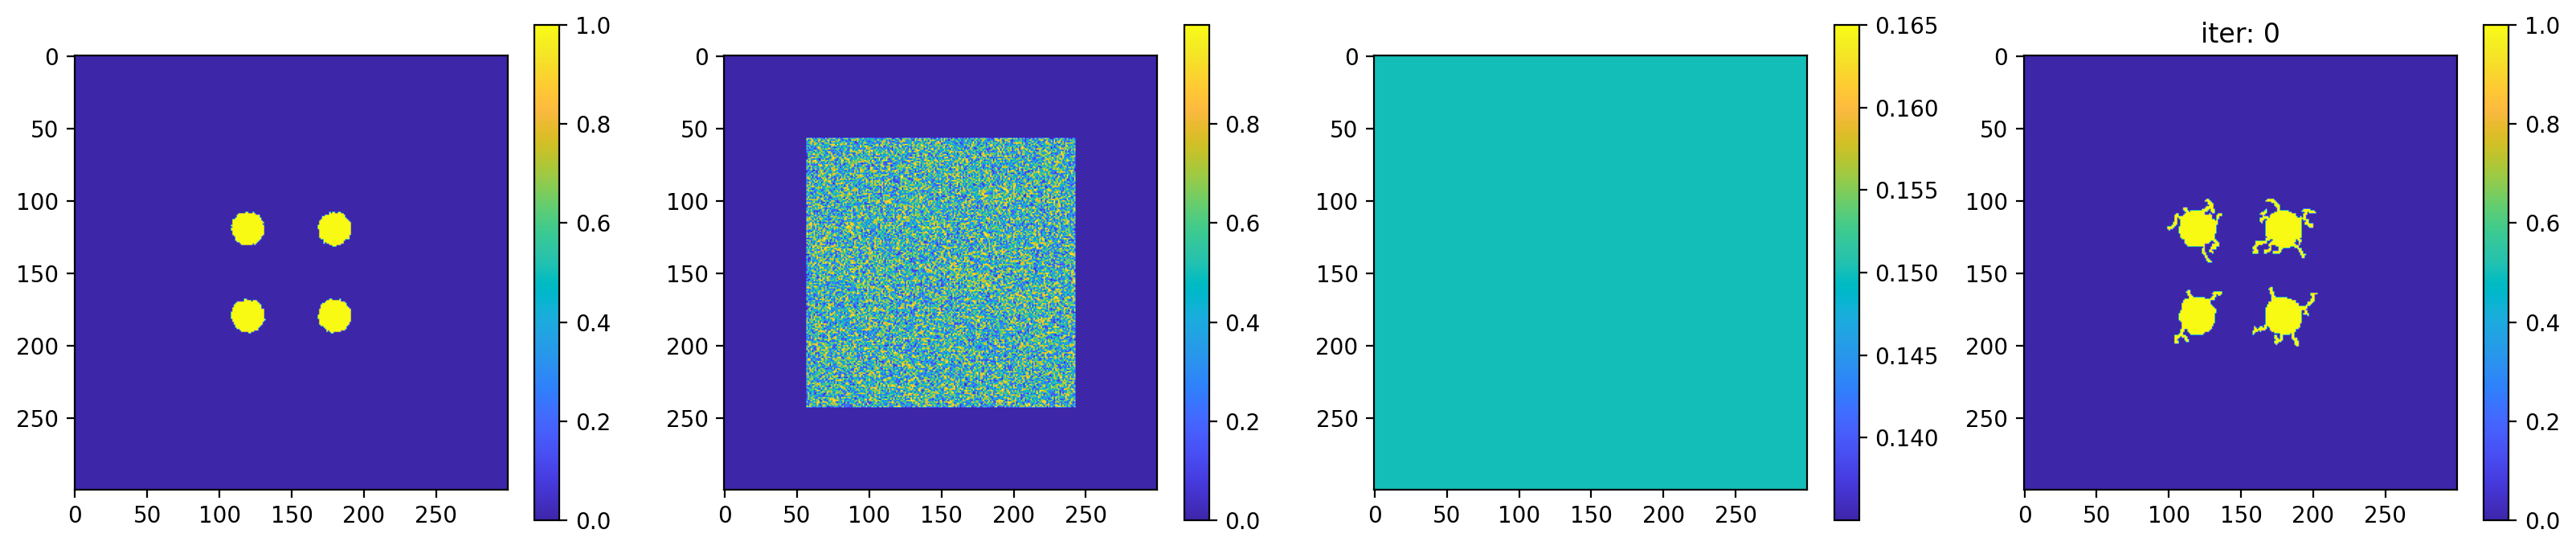

Random ID: 4860


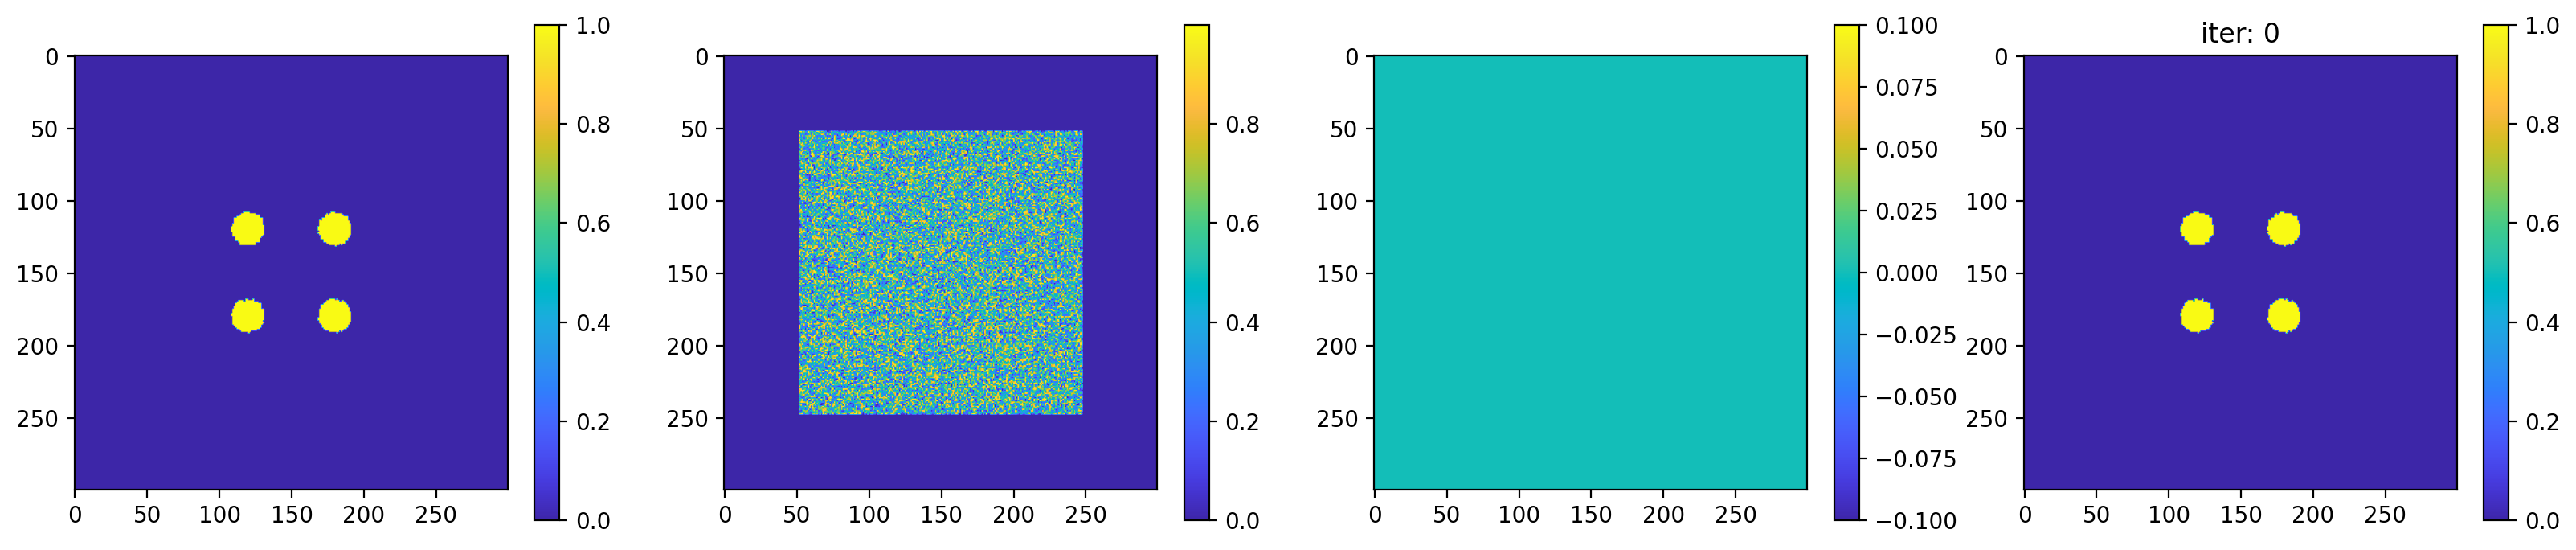

Random ID: 5939


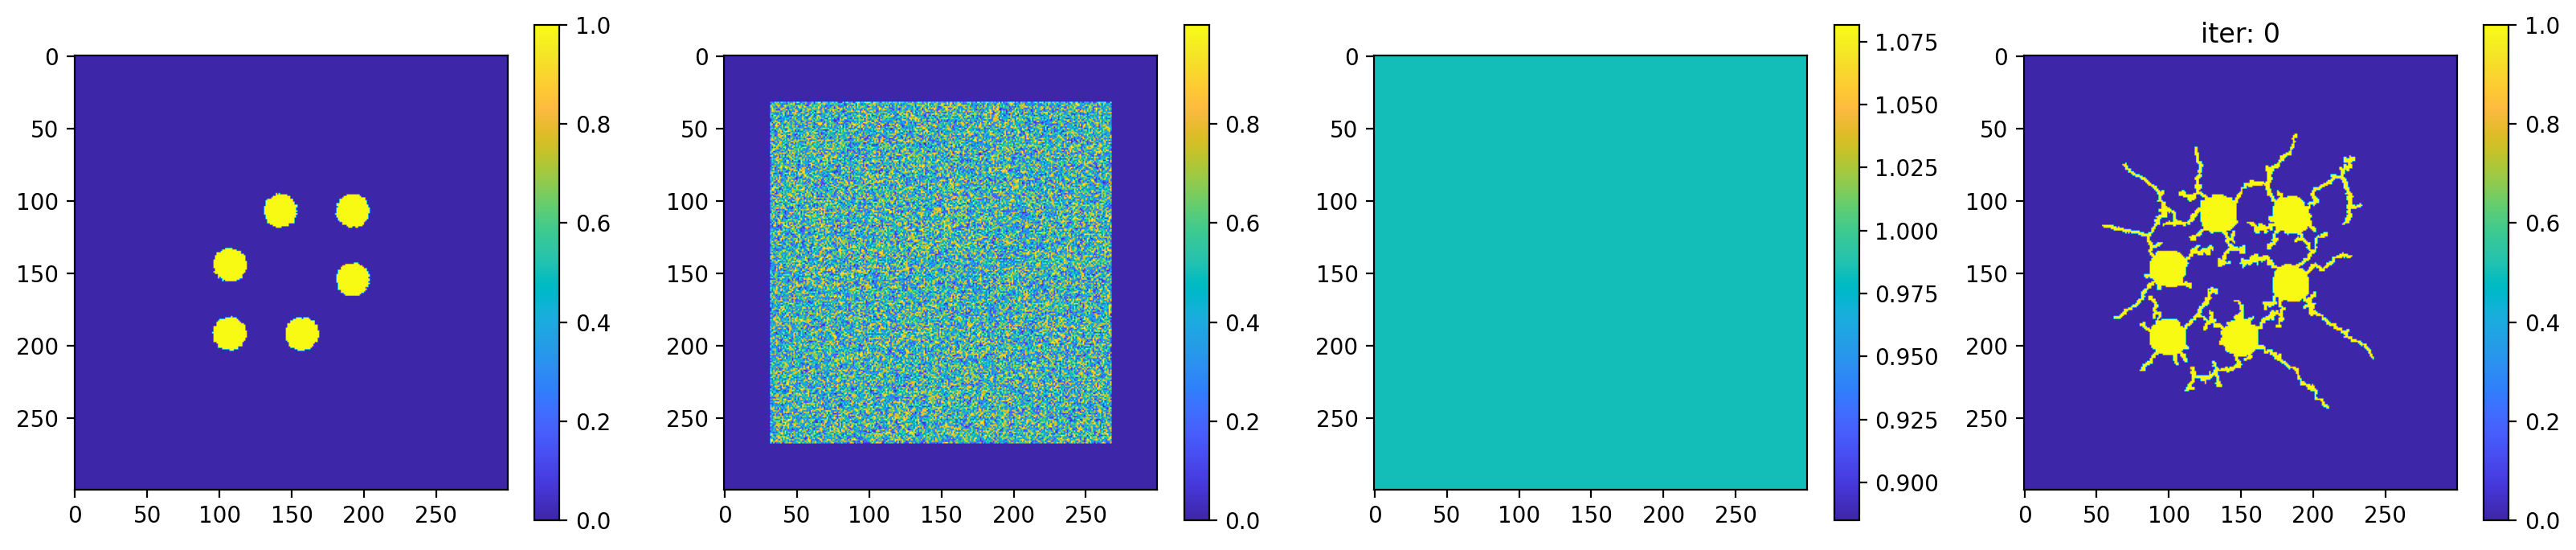

In [8]:
h5 = h5py.File(save_file_2, mode='r')
data_in = h5.get('input')
data_out = h5.get('output')
print(f'Input data shape: {data_in.shape} | Output data shape: {data_out.shape}')

for _ in range(10):
    id = np.random.randint(data_in.shape[0])
    print(f'Random ID: {id}')
    plt.figure(figsize=(20, 4), dpi=200)
    plt.subplot(1,4,1)
    plt.imshow(data_in[id,0,:,:],cmap = parula_map)
    plt.colorbar()
    plt.subplot(1,4,2)
    plt.imshow(data_in[id,1,:,:],cmap = parula_map)
    plt.colorbar()
    plt.subplot(1,4,3)
    plt.imshow(data_in[id,2,:,:],cmap = parula_map)
    plt.colorbar()
    plt.subplot(1,4,4)
    plt.imshow(data_out[id,0,:,:],cmap = parula_map)
    plt.title(f'iter: {int(data_in[id,1,0,0]*35000)}')
    plt.colorbar()
    plt.show()